<a href="https://colab.research.google.com/github/nmaguette/machine_learning_workshops/blob/master/Maguette_D1_1_Linear_Regression%2Cpart2_Boston_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=center><font size=5>Linear Regression on Boston Housing Dataset</font></h1>

### Table of contents


- [Data](#data)
- [Data Statistics](#data_stats)
- [Exploratory Data Analysis](#data_exp)
- [Data Preparation](#data_prep)
- [Linear regression](#LR)

### Data <a id="data"></a>

In [0]:
from sklearn.datasets import load_boston
dataset = load_boston()

In [0]:
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [0]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
import pandas as pd

df = pd.DataFrame(dataset.data, columns= dataset.feature_names)
df['MEDV'] = dataset.target

print(df.shape)

df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Data Statistics <a id="data_stats"></a>

&#x270d; Describe statistics of data including the central tendency, dispersion and shape of the dataset’s distribution.

In [0]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


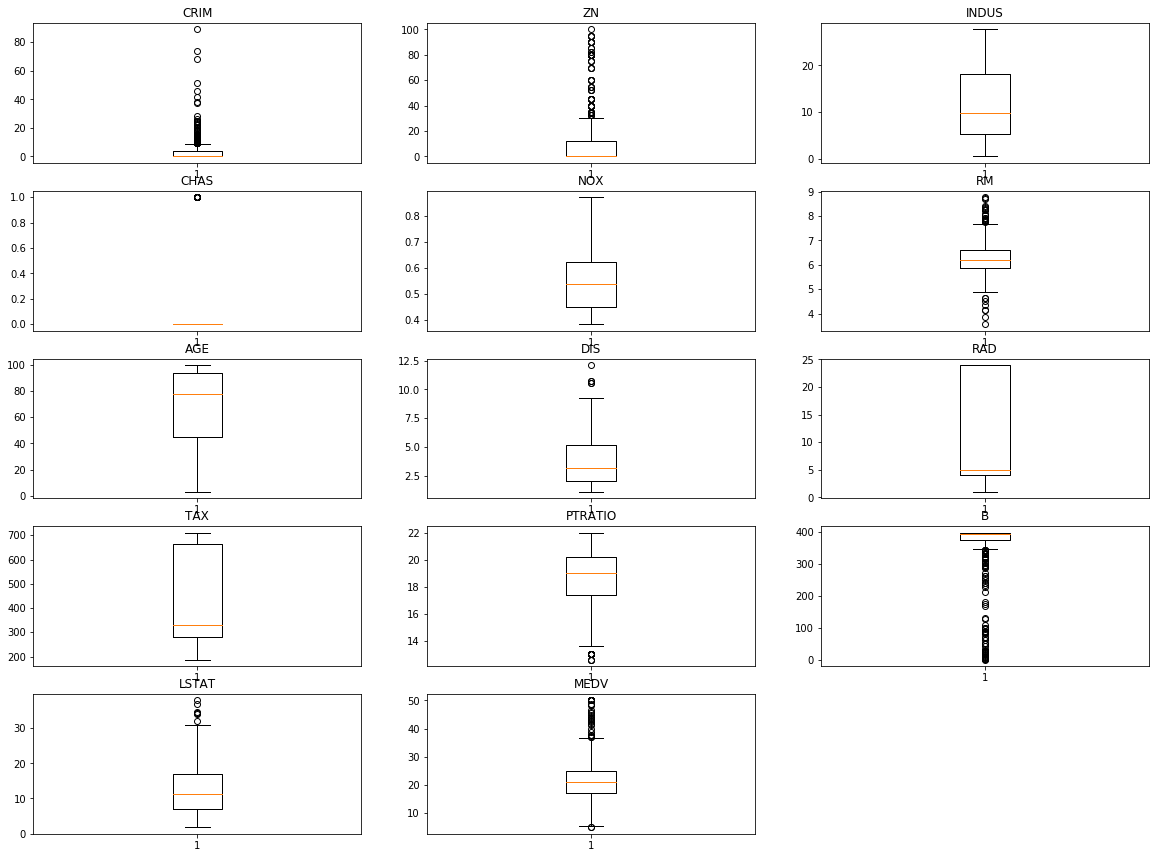

In [0]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 18))
for colname, i in zip(df.columns, range(1,len(df.columns)+1)):
  ax = fig.add_subplot(6, 3, i)
  ax.boxplot(df[colname])
  ax.set_title(colname)
  #ax.set_xlabel(colname)

#plt.legend(loc='best')
plt.show()

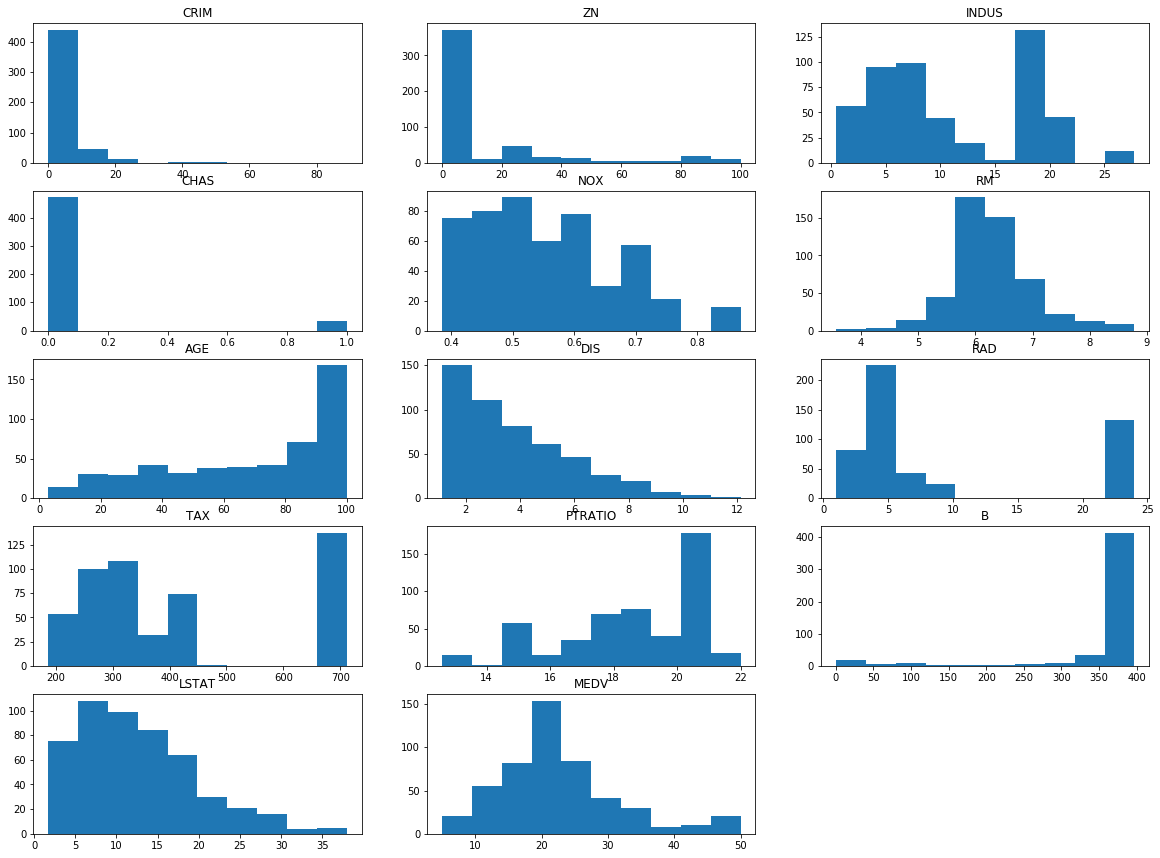

In [0]:
fig2 = plt.figure(figsize=(20, 18))
for colname, i in zip(df.columns, range(1,len(df.columns)+1)):
  ax = fig2.add_subplot(6, 3, i)
  ax.hist(df[colname])
  ax.set_title(colname)
  #ax.set_xlabel(colname)

#plt.legend(loc='best')
plt.show()

&#x270d; Check if there is any missing value in the dataset.

In [0]:
print('Isna method:\n', df.isna().sum())
#print('\nIsnull method:\n', df.isnull().sum())

Isna method:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### Exploratory Data Analysis <a id="data_exp"></a>

&#x270d; Measure correlation among features.

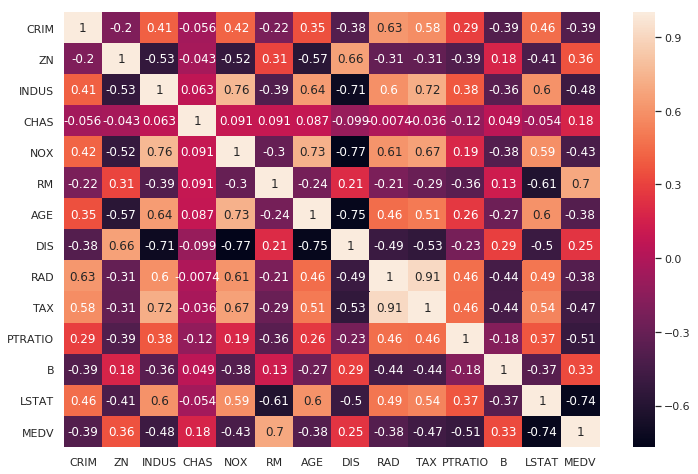

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(rc={'figure.figsize':(12, 8)})

correlation_matrix = df.corr()
sns.heatmap(data= correlation_matrix, annot=True)

&#x270d; If you want to remove some features, which ones would be? and why?

<font color='green'>If we want to remove some features, it will be either **TAX** or **RAD**, because the two features are strongly correlated with a coefficient=0.91 (close to 1).\
\
Same for features **LSTAT** and **MEDV** with a negative correlation close to -1.\
\
All strong negative correlation (corr ~ -1):
*   **LSTAT** and **MEDV**
*   **LSTAT** and **RM**
*   **DIS** and **AGE**
*   **DIS** and **NOX**
*   **DIS** and **INDUS**

All strong positive correlation  (corr ~ 1):
*   **TAX** and **RAD**
*   **TAX** and **INDUS**
*   **NOX** and **INDUS**
*   **NOX** and **AGE**
*   **RM** and **MEDV**
*   **DIS** and **ZN**

etc.</font>



&#x270d; If you have to select only two features for training, which onese would be? and why?

<font color='green'>If we have to select only two features for training, it will be features **LSTAT** and **RM**, because these are two features that are the most correlated to our target **MEDV**.</font>

&#x270d; Use a scatter plot and show how the two features vary with the target variable MEDV.

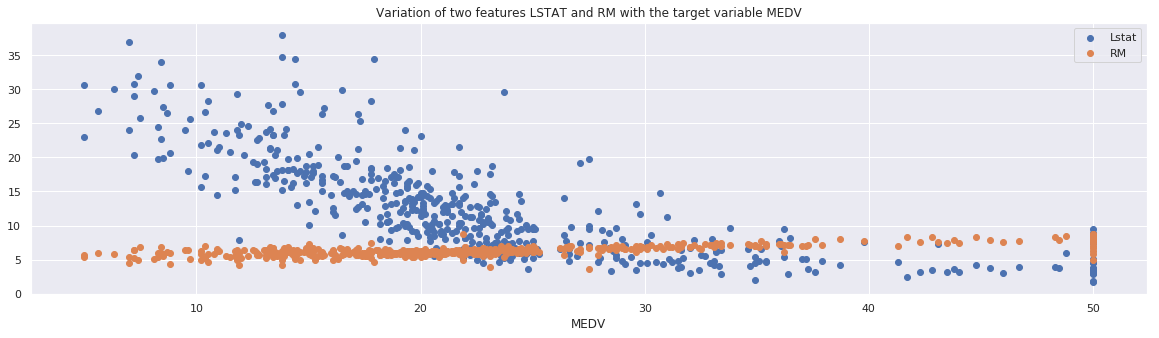

In [0]:
plt.figure(figsize=(20, 5))
plt.scatter(df['MEDV'], df['LSTAT'], data=df, label='Lstat')
plt.scatter(df['MEDV'], df['RM'], data=df, label='RM')
plt.xlabel('MEDV')
plt.title('Variation of two features LSTAT and RM with the target variable MEDV')
#plt.yscale('log')

plt.legend(loc='best')
plt.show()

&#x270d; What are your observations?

- The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.
- The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.

&#x270d; Plot the distribution of the target variable MEDV.

Text(0.5, 1.0, 'Distribution of the target variable MEDV')

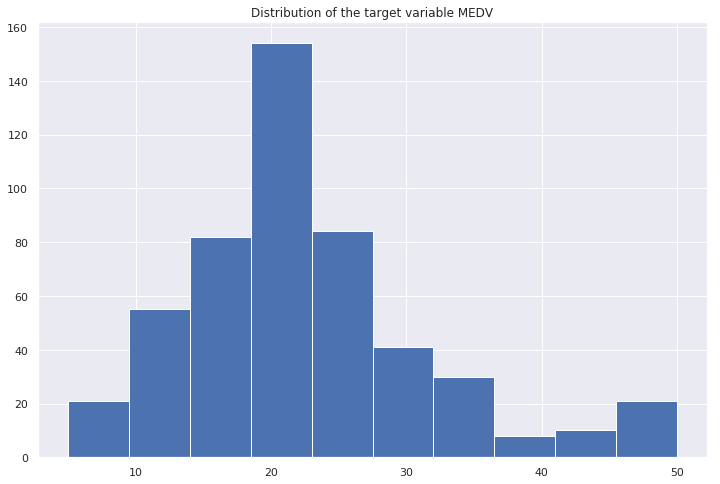

In [0]:
  plt.hist(df['MEDV'])
  plt.title('Distribution of the target variable MEDV')

### Data Preparation <a id="data_prep"></a>

&#x270d; Define predictor variable 'X' and target variable 'y'.

In [0]:
y = df.MEDV
X = df.loc[:,{'LSTAT', 'RM'}]
print(X.head())

   LSTAT     RM
0   4.98  6.575
1   9.14  6.421
2   4.03  7.185
3   2.94  6.998
4   5.33  7.147


&#x270d; Split the data into training set with 80% of the samples and test set with the remaining 20%.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (354, 2)
X_test shape: (152, 2)
y_train shape: (354,)
y_test shape: (152,)


### Linear regression  <a id="LR"></a>

&#x270d; Calculate linear regression parameters including the linear regression intercept and the linear regression coefficient, and make predictions over the data.

In [0]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print('Intercept: \n', lin_reg.intercept_)
print('Coefficient(s): \n', lin_reg.coef_)

Intercept: 
 -0.2288634481994194
Coefficient(s): 
 [-0.67359875  4.99734079]


&#x270d; Interpreting the coefficients

<font color='green'>The coefficients give us the linear equation to calculate MEDV from LSTAT and RM.\
\
**MEDV = coef_[0]\*LSTAT + coef_[1]\*RM + intercept_\
MEDV = -0.67\*LSTAT + 4.99\*RM - 0.23**
 </font>

&#x270d; Measure r2 score over the training/test sets.

In [0]:
from sklearn.metrics import r2_score 

y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

print('r2 score for training set:', r2_score(y_train, y_train_pred))
print('r2 score for test set:', r2_score(y_test, y_test_pred))

r2 score for training set: 0.6486379416291157
r2 score for test set: 0.5998518447715597


<font color='green'>
R-squared explains to what extent the variance of features in our model explains the variance of the target.

And here in our model, we can see that the R² for both training and testing datasets are close to 0.6. So it means that approximately 60% of the observed variation can be explained by the model's inputs (LSTAT and RM).
 </font>


The formula for R-Squared is :
\begin{aligned} &\text{R}^2 = 1 - \frac{ \text{Explained Variation} }{ \text{Total Variation} } \\ \end{aligned}